In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import aps_ai
from aps_ai.beamline34IDC.simulation.facade import Implementors
from aps_ai.beamline34IDC.facade.focusing_optics_factory import focusing_optics_factory_method, ExecutionMode
from aps_ai.beamline34IDC.facade.focusing_optics_interface import Movement, AngularUnits, DistanceUnits
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import get_default_input_features
from aps_ai.common.util.shadow.common import plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution, load_shadow_beam, PreProcessorFiles
from aps_ai.common.util import clean_up
from aps_ai.common.util.wrappers import PlotMode

from Shadow.ShadowTools import focnew
from pathlib import Path


Qt5Agg: unable to import specified backend (or its dependency); no plots


Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2415, in magic
    return self.run_line_magic(magic_name, magic_arg_s, _stack_depth=2)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.frame

In [4]:
%matplotlib inline

In [7]:
root_dir = Path(aps_ai.__file__).parents[1]
work_dir = root_dir / 'work_directory'
os.chdir(work_dir)
print(work_dir)

/Users/skandel/code/oasys/AI-ML_Control_System/work_directory


In [8]:
clean_up()

In [9]:
verbose=False
input_beam = load_shadow_beam("primary_optics_system_beam.dat")
input_features = get_default_input_features()

# Focusing Optics System -------------------------

focusing_system = focusing_optics_factory_method(execution_mode=ExecutionMode.SIMULATION, implementor=Implementors.SHADOW, bender=1)

input_features = get_default_input_features()

# V-KB: sigma min 0.00037730694191372074 found at (U,D): [142.0, 240.5]
# H-KB: sigma min 0.00016296492041427147 found at (U,D): [216.5, 112.5]
#
input_features.set_parameter("coh_slits_h_aperture", 0.03)
input_features.set_parameter("coh_slits_v_aperture", 0.07)
input_features.set_parameter("vkb_motor_1_bender_position", 138.0)
input_features.set_parameter("vkb_motor_2_bender_position", 243.5)
input_features.set_parameter("hkb_motor_1_bender_position", 215.5)
input_features.set_parameter("hkb_motor_2_bender_position", 110.5)
#input_features.set_parameter("coh_slits_h_aperture", 0.15)
#input_features.set_parameter("coh_slits_v_aperture", 0.15)
#input_features.set_parameter("vkb_motor_1_bender_position", 141.5)
#input_features.set_parameter("vkb_motor_2_bender_position", 239.5)
#input_features.set_parameter("hkb_motor_1_bender_position", 216.5)
#input_features.set_parameter("hkb_motor_2_bender_position", 113.0)

focusing_system.initialize(input_photon_beam=input_beam,
                           input_features=input_features,
                           power=1,
                           rewrite_preprocessor_files=PreProcessorFiles.NO,
                           rewrite_height_error_profile_files=False)

print("Initial V-KB bender positions and q (up, down) ",
      focusing_system.get_vkb_motor_1_bender(units=DistanceUnits.MICRON),
      focusing_system.get_vkb_motor_2_bender(units=DistanceUnits.MICRON),
      focusing_system.get_vkb_q_distance())
print("Initial H-KB bender positions and q (up, down)",
      focusing_system.get_hkb_motor_1_bender(units=DistanceUnits.MICRON),
      focusing_system.get_hkb_motor_2_bender(units=DistanceUnits.MICRON),
      focusing_system.get_hkb_q_distance())

Initial V-KB bender positions and q (up, down)  138.00000000000003 243.5 (232.14563499999997, 230.84988149999998)
Initial H-KB bender positions and q (up, down) 215.5 110.5 (123.0290065, 123.786477)


write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Downstream_HKB_bender_profile.dat written to disk.


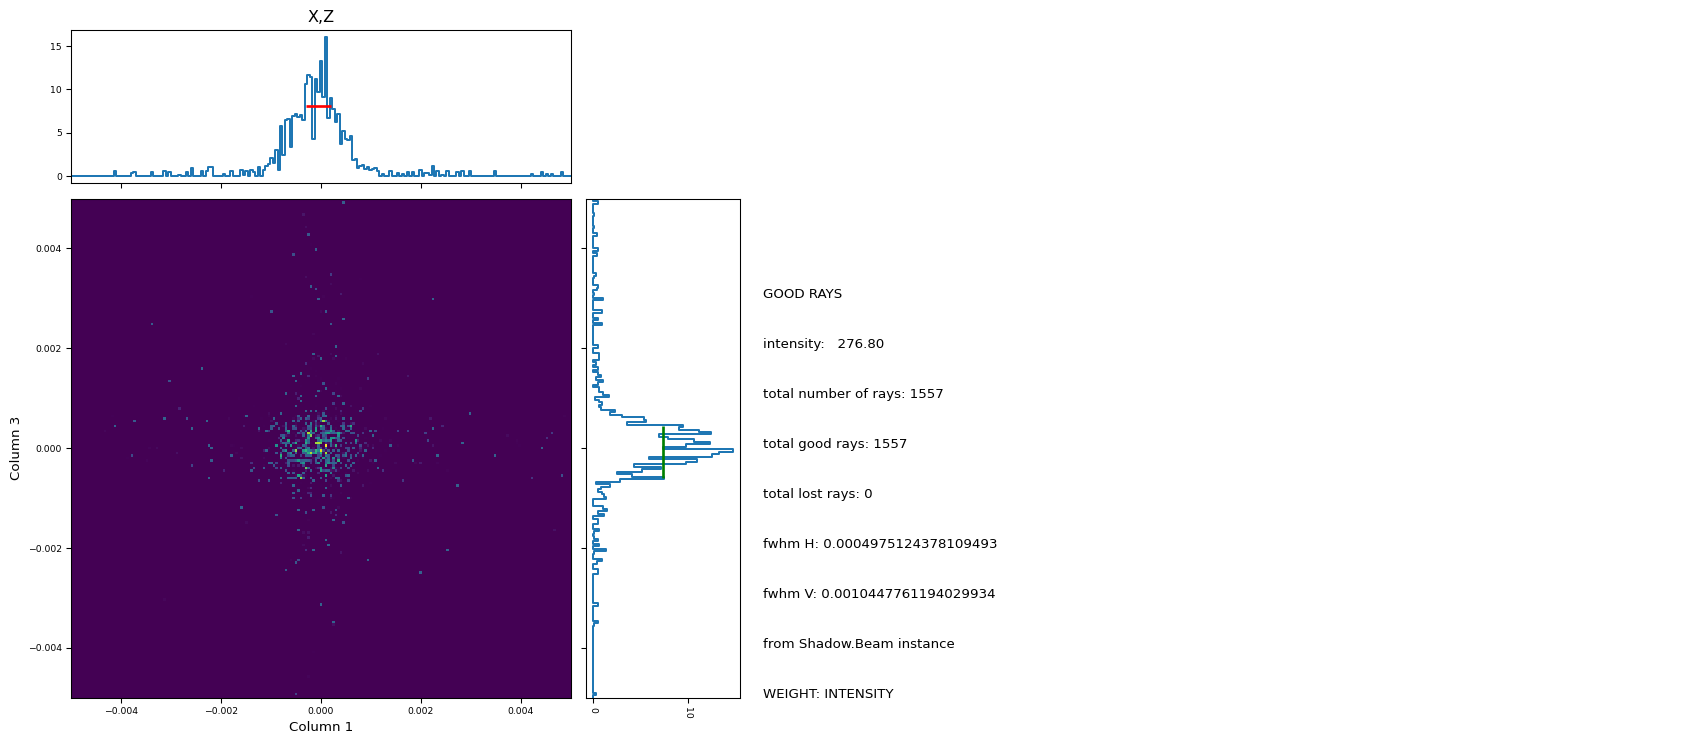

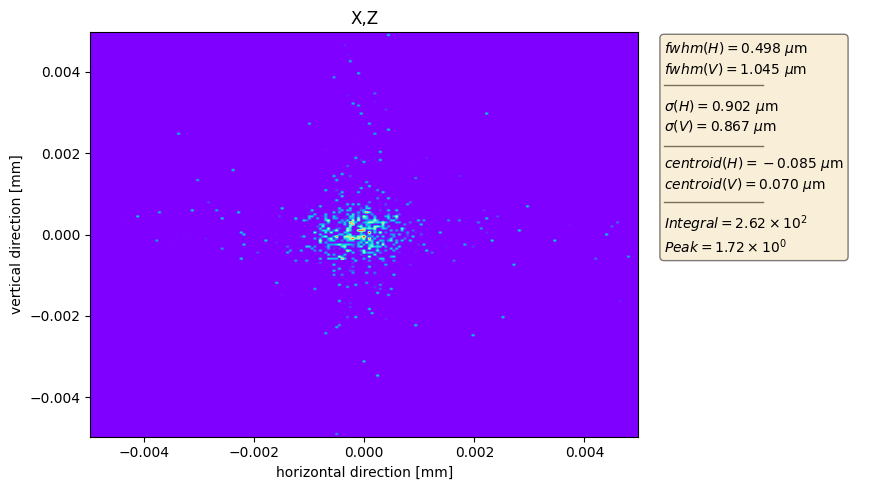

Initial Sigma (HxV):  902.0  x  867.0  nm


In [10]:
# ----------------------------------------------------------------
# perturbation of the incident beam to make adjustements necessary

random_seed = 2120 # for repeatability

focusing_system.perturbate_input_photon_beam(shift_h=0.0, shift_v=0.0)

output_beam = focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=True, debug_mode=False, random_seed=random_seed)

plot_shadow_beam_spatial_distribution(output_beam, nbins=201, xrange=[-0.005, 0.005], yrange=[-0.005, 0.005], plot_mode=PlotMode.NATIVE)
plot_shadow_beam_spatial_distribution(output_beam, nbins=201, xrange=[-0.005, 0.005], yrange=[-0.005, 0.005], plot_mode=PlotMode.INTERNAL)

_, dict = get_shadow_beam_spatial_distribution(output_beam, nbins=201, xrange=[-0.005, 0.005], yrange=[-0.005, 0.005])

print("Initial Sigma (HxV): ", round(dict.get_parameter("h_sigma")*1e6, 0), " x ", round(dict.get_parameter("v_sigma")*1e6, 0), " nm")

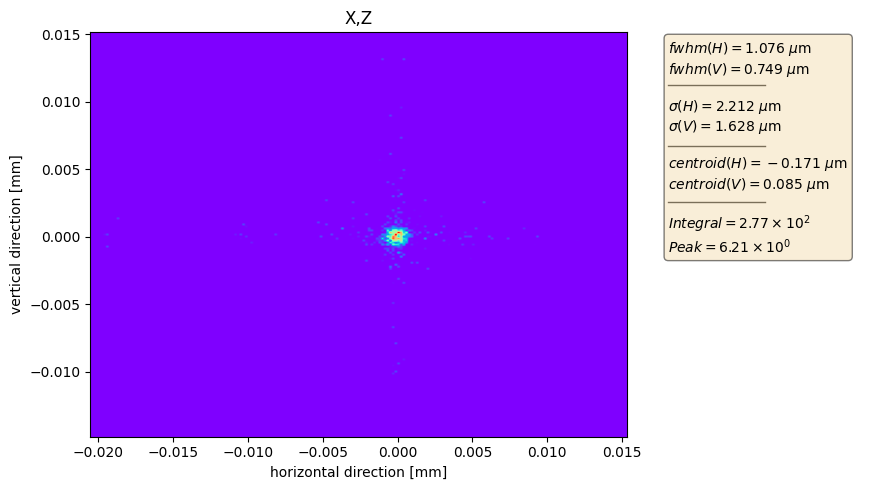

In [11]:
focusing_system.move_vkb_motor_3_pitch(0.00001, movement=Movement.RELATIVE, units=AngularUnits.MILLIRADIANS)



plot_shadow_beam_spatial_distribution(focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=False, debug_mode=False, random_seed=random_seed),
                                      xrange=None, yrange=None);

write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Downstream_VKB_bender_profile.dat written to disk.


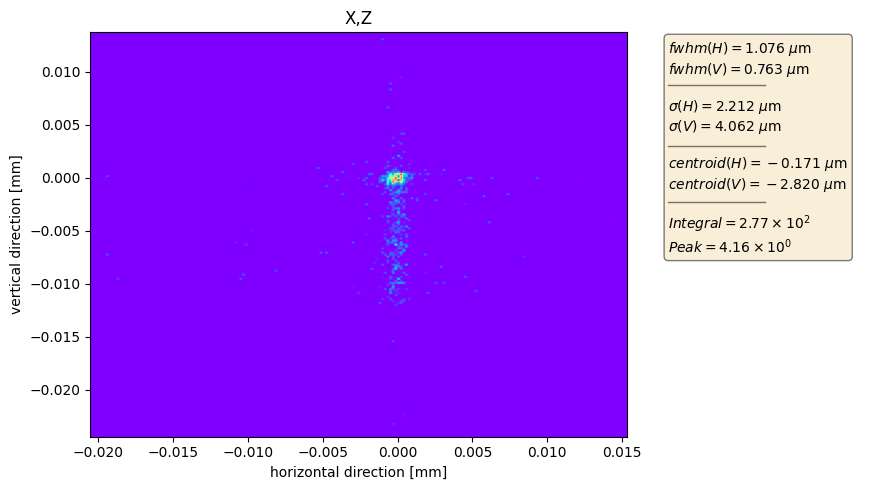

In [12]:
focusing_system.move_vkb_motor_1_bender(0.1, movement=Movement.RELATIVE, units=AngularUnits.MILLIRADIANS)



plot_shadow_beam_spatial_distribution(focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=False, debug_mode=False, random_seed=random_seed),
                                      xrange=None, yrange=None);

In [13]:
clean_up()
